##### 1. Your views about the problem statement?    
    - The problem statement presented by TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.  
    - The goal is to create a machine learning model that predicts the salaries of newly hired employees based on various features such as their qualifications, experience, and other relevant factors. 
    - This approach allows for data-driven decision-making, ensuring fair and competitive compensation. By leveraging historical data, the company can streamline its hiring process and maintain consistency in salary offerings, ultimately aiding in talent retention and satisfaction.  

#####  2. What will be your approach to solving this task?    
    - Collecting the data and understanding the dataset.  
    - Data Preprocessing • Handle missing values  • Convert categorical variables to numeric 
    - Exploratory Data Analysis (EDA):  Analyze the dataset to identify patterns, correlations, and outliers with isualizations. 
    - Feature selection of variables.  
    - Choose several regression models to train and evaluate, including Linear Regression, Decision Trees, Random Forests. 
    - Split the data into training and testing sets. Train the models and evaluate their performance using metrics like Mean Squared Error (MSE) and R-squared.
    - Fine-tune the best performance model by adjesting hyperparameters to enhance it's predictive accuracy.tance.mportance.


#####   3. What were the available ML model options you had to perform this task?    
    - There are several regression models to train and evaluate, like 'Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'.

#####    4. Which model’s performance is best and what could be the possible reason for that? 
    Based on the metrics provided, the best model is the Random Forest model. Here's why:

######      MAE (Mean Absolute Error): Random Forest has the lowest MAE of 5900.953258, which indicates that it has the smallest average difference between predicted and actual values.
######      MSE (Mean Squared Error): Random Forest has a relatively low MSE of 5.801052e+07, which indicates that it has a good balance between bias and variance.
######      R2 (R-Squared): Random Forest has the highest R2 value of 0.630078, which indicates that it explains about 63% of the variance in the target variable.
    Overall, the Random Forest model seems to be the best performer among the models evaluated, with a good balance of accuracy and interpretability.

    Here's a brief explanation of each model's performance:

    Linear Regression, Ridge Regression, and Lasso Regression have similar performance, with relatively high MAE and MSE values. They may be overfitting or underfitting the data.
    Decision Tree has a high MAE and MSE, indicating that it may be overfitting the data or not capturing the underlying relationships well.
    Gradient Boosting has a relatively high MAE and MSE, but a decent R2 value. It may be overfitting the data or not capturing the underlying relationships well.
    Random Forest, on the other hand, has a good balance of accuracy and interpretability, making it the best performer among the models evaluated.

##### 5. What steps can you take to improve this selected model’s performance even further?    
    - Feature Engineering: Create new features that may enhance the model's predictive power, such as interaction terms or aggregated metrics.  
    - Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the optimal hyperparameters for the Random Forest model. 
    - Collect More Data: If possible, gather more diverse and representative data to train the model, which can help improve its generalization capabilities.
    - Increase the Number of Trees (Estimators) : Random Forest performance ofter benefits from increasing the number of decision trees (estimators).

## Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV file located at the specified file path into a pandas DataFrame object and store it in a variable.

df = pd.read_csv('C:/Users/Ananya/Documents/Jupyter_Notebook/ML case Study.csv')

college = pd.read_csv('C:/Users/Ananya/Documents/Jupyter_Notebook/Colleges.csv')

cities = pd.read_csv('C:/Users/Ananya/Documents/Jupyter_Notebook/cities.csv')

In [3]:
df.head()          # pandas returns the first few rows of a DataFrame(by default 1st 5 rows)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
# Change the college field into numerical data type

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [6]:
# Tier1, Tier2, Tier3

In [7]:
# Assign tier values to colleges in the DataFrame based on their tier classification
# If a college is in 'Tier1', 'Tier2' and 'Tier3' set its value to 1, 2 and 3 respectively

conditions = [df["College"].isin(Tier1), 
              df["College"].isin(Tier2), 
              df["College"].isin(Tier3)]
choices = [1, 2, 3]
df["College"] = np.select(conditions, choices)          # np.select function replaces the values in the "College" column based on the conditions

In [8]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [9]:
# Changing the column names

cities = cities.rename(columns={'Metrio City': 'Metro City', 'non-metro cities': 'Non-Metro City'})

In [10]:
cities.head()

,Metro City,Non-Metro City
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [11]:
# Extracting lists of Metro and Non-Metro cities from the 'cities' DataFrame and assigning 1 if Metro and 0 if not
metro = cities['Metro City'].tolist()
non_metro = cities['Non-Metro City'].tolist()

df['City'] = np.where(df['City'].isin(metro), 1, 0)         # Assigning value as 1 if city is merto and 0 if non-metro

In [12]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [13]:
# Converting Categorical column 'Role' into numerical by creating Dummy variables
# pandas creates new columns for each unique value in the Role column, and assigns a 1 or 0 to each row depending on whether the row belongs to that category or not.

df = pd.get_dummies(df, columns=['Role'], drop_first=True)
df = df.astype(int)          # converts the data type of the entire DataFrame to int.
df.sample(5)          # returns a random sample of 5 rows from the DataFrame

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
354,1,0,65360,4,85,18,67305,0
615,1,0,61626,3,42,47,102099,1
8,3,1,53124,4,40,37,70083,0
345,2,1,50768,4,65,34,63243,0
118,3,0,51099,3,71,49,67516,0


In [14]:
df.info()         # provides the summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int32
 1   City                 1589 non-null   int32
 2   Previous CTC         1589 non-null   int32
 3   Previous job change  1589 non-null   int32
 4   Graduation Marks     1589 non-null   int32
 5   EXP (Month)          1589 non-null   int32
 6   CTC                  1589 non-null   int32
 7   Role_Manager         1589 non-null   int32
dtypes: int32(8)
memory usage: 49.8 KB


In [15]:
# Checking missing values in the dataset

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

##### There are no missing values in our DataFrame

In [16]:
# Statistical information on numerical data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


##### -> Previous CTC and CTC columns have a large range of values, with a high standard deviation, indicating a skewed distribution.
##### -> Previous job change has a relatively low standard deviation, indicating a more uniform distribution.

### Outlier Detection

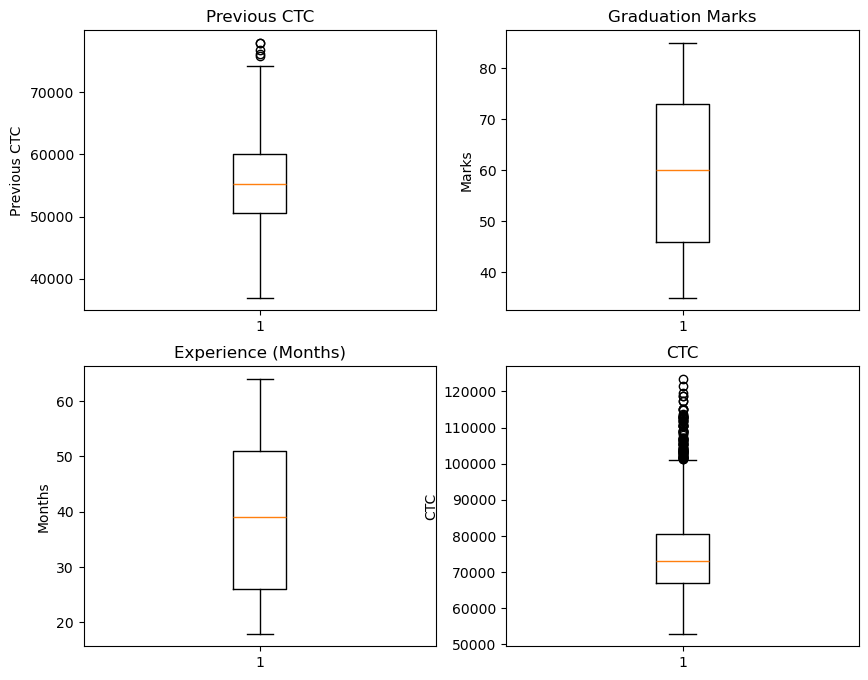

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))          # Creates a figure with multiple subplots, here 2x2

# Create box plots, one for each column of the df dataframe
ax[0, 0].boxplot(df['Previous CTC'])
ax[0, 0].set_title('Previous CTC')
ax[0, 0].set_ylabel('Previous CTC')

ax[0, 1].boxplot(df['Graduation Marks'])
ax[0, 1].set_title('Graduation Marks')
ax[0, 1].set_ylabel('Marks')

ax[1, 0].boxplot(df['EXP (Month)'])
ax[1, 0].set_title('Experience (Months)')
ax[1, 0].set_ylabel('Months')

ax[1, 1].boxplot(df['CTC'])
ax[1, 1].set_title('CTC')
ax[1, 1].set_ylabel('CTC')

# Show the plot
plt.show()

##### The median of the CTC is around 75000 and the distribution is right-skewed with many outliers.
##### The median of the previous CTC is around 55000 and the distribution is right-skewed with some outliers.

### Handling Outliers

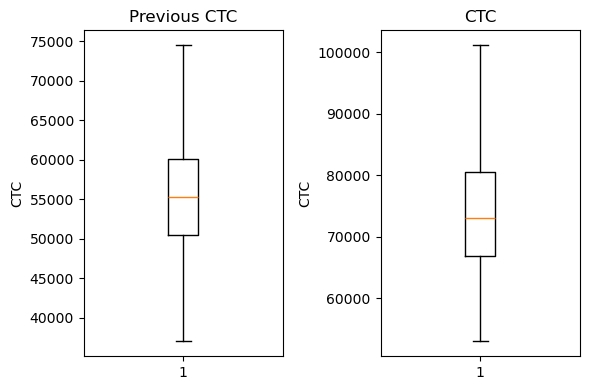

In [18]:
columns = ['CTC', 'Previous CTC']

# Replace outliers with the lower or upper bound for Previous CTC and CTC columns
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1       # Calculates the InterQuartile Range, which is the difference between the third and first quartiles.

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Check for outliers again
fig, ax = plt.subplots(1, 2, figsize=(6, 4))

# Create box plots
ax[0].boxplot(df['Previous CTC'])
ax[0].set_title('Previous CTC')
ax[0].set_ylabel('CTC')

ax[1].boxplot(df['CTC'])
ax[1].set_title('CTC')
ax[1].set_ylabel('CTC')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Correlation matrix

The correlation matrix shows the correlation between different features in a dataset. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.042154,-0.055060,0.003539,0.011752,-0.025930,-0.014749
City,-0.014946,1.000000,0.003851,0.051670,-0.018616,-0.023613,-0.026940,-0.048671
Previous CTC,0.042154,0.003851,1.000000,0.006280,-0.032854,0.118746,0.246914,0.012643
Previous job change,-0.055060,0.051670,0.006280,1.000000,0.019267,0.023488,0.009484,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032854,0.019267,1.000000,-0.057061,-0.004665,0.017858
EXP (Month),0.011752,-0.023613,0.118746,0.023488,-0.057061,1.000000,0.310453,-0.026751
CTC,-0.025930,-0.026940,0.246914,0.009484,-0.004665,0.310453,1.000000,0.611021
Role_Manager,-0.014749,-0.048671,0.012643,-0.017150,0.017858,-0.026751,0.611021,1.000000


##### The correlation between 'College' and 'CTC' is -0.025930, which suggests a very weak negative correlation.
##### The correlation between 'Role_Manager' and 'CTC' is 0.611021, indicating a strong positive correlation.

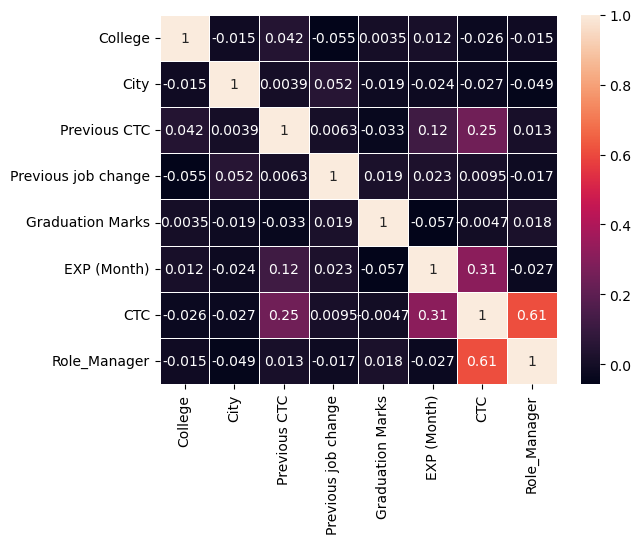

In [20]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.5) 
plt.show() 

In [21]:
# Extracting the 'CTC' column to find its correlations with other features
quality_correlations = corr_matrix['CTC'].drop('CTC')  # Exclude self-correlation

# Finding the feature with the highest correlation with 'CTC'
most_correlated_feature = quality_correlations.idxmax()
highest_correlation = quality_correlations.max()

most_correlated_feature, highest_correlation

('Role_Manager', 0.6110214739898435)

##### A student's current salary is most strongly influenced by their role and previous work experience, while their academic performance and college have little impact on their career outcomes, hence the outcome.

## Applying various Machine Learning models

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Select all columns from the DataFrame df except the 'CTC' column as the feature variable, the value we want to predict(X)(InDependent).
Extract the 'CTC' column as the target variable(y)(Dependent)

Split the dataset into two parts:    
    X_train : Features used for training the model.     
    y_train : Corresponding target values for training.     
    X_test : Features used for evaluating the model's performance after training.     
    y_test : Corresponding target values for testing.     
    test_size = 0.2 : Specifies that 20% of the data will be used for testing, and the remaining 80% for training.     
    random_state = 42 : Ensures that the split is consistent every time you run the code     

In [23]:
# Define features and target variable
X = df.drop('CTC', axis=1)
y = df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


Defining the Models :
        Created a dictionary 'models' that stores different regression models

Training and Evaluation : 
    Iterate through the 'models' dictionary, training each model and evaluating its performance.

    MAE: Average absolute difference between predicted and actual values.     
    MSE: Average squared difference, penalizes larger errors more heavily.     
    R2: A measure of how well the model fits the data (higher R2 means better fit). A value closer to 1 means a better fit.    ).

In [24]:
# Define the necessary models   ada boost , xg boost , bagging
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, learning_rate=1.0, random_state=42),
    'XGBRegressor': xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, objective='reg:squarederror', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)     # Train the model using the training data and the target values
    predictions = model.predict(X_test)     # Make predictions on the test data
    mae = mean_absolute_error(y_test, predictions)     # Calculate the Mean Absolute Error (MAE) to measure prediction accuracy
    mse = mean_squared_error(y_test, predictions)     # Calculate the Mean Squared Error (MSE) to assess prediction accuracy
    r2 = r2_score(y_test, predictions)     # Calculate the R-squared (r2) score which measures the goodness of fit of the model.
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}     # Store the calculated evaluation metrics for each of model
    

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE        R2
Linear Regression  6793.721101  6.601306e+07  0.579041
Ridge Regression   6801.122773  6.611894e+07  0.578366
Lasso Regression   6794.223987  6.601842e+07  0.579007
Decision Tree      7620.386792  1.066623e+08  0.319825
Random Forest      5944.623491  5.919708e+07  0.622506
Gradient Boosting  6180.139953  6.196577e+07  0.604850
Bagging            6610.116352  9.502637e+07  0.394026
AdaBoostRegressor  6683.015077  6.772261e+07  0.568139
XGBRegressor       6296.404113  6.273148e+07  0.599967


##### Performance of each regression model on the test data : 

Random Forest and Gradient Boosting: These models performed the best, with the lowest MAE and MSE and the highest R-squared values. This indicates they are good at fitting the data and making accurate predictions.

Linear Regression, Ridge Regression, Lasso Regression: These models have similar performance, slightly low than the ensemble methods. This suggests that the relationships between features and the target variable might be non-linear, and ensemble methods capture these non-linearities better.

Decision Tree: This model has the highest MAE and MSE and the lowest R-squared. This indicates it might overfit the training data and generalize poorly to unseen data.

In [25]:
# Choose the best model based on R2 score
best_model_name = results_df['R2'].idxmax()      # index of the maximum R-squared value
best_model = models[best_model_name]

print(f"Best Model: {best_model}")

Best Model: RandomForestRegressor()


##### Overall, the results suggest that ensemble methods like 'Random Forest' and 'Gradient Boosting' are more suitable for this dataset compared to linear models and the decision tree.
##### 'Random Forest' performed the best out of all the models.

### Hyperparameter tuning for a Random Forest Regression model using Grid Search

In [26]:
# Hyperparameter tuning example (for Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# cv=5 : The data is split into 5 folds, and the model is trained and evaluated 5 times
# Trains multiple models with all the different hyperparameter combinations and evaluates their performance using the cross-validation strategy
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5) 
grid_search.fit(X_train, y_train)

# Final evaluation of the best model
final_predictions = grid_search.best_estimator_.predict(X_test)      # holds the models best combination of hyperparameters found during the search.
final_mae = mean_absolute_error(y_test, final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final MAE: {final_mae:.2f},   Final MSE: {final_mse:.2f},   Final R2: {final_r2:.2f}")

Final MAE: 5894.51,   Final MSE: 58336726.09,   Final R2: 0.63


Cross-Validation: A technique to assess model performance by splitting the data into multiple folds and using each fold as a test set while training on the remaining folds. This helps avoid overfitting and provides a more reliable estimate of the model's generalization ability.

In [27]:
# Cross-Validation for R-Squared
from sklearn.model_selection import cross_val_score, KFold

# Define the necessary models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(), 
    "Ridge_alpha": Ridge(alpha=0.1), 
    "Lasso_alpha": Lasso(alpha=0.1)
}

# Store results
results = {}

# n_splits=6: The data will be split into 6 folds for cross-validation.
# shuffle=True: The data will be shuffled before splitting, ensuring randomness.
# random_state=5: Sets a seed for the random number generator for reproducibility.

for name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state=5)      # Analysing Cross-Validation metrics for R2 using KFold 
    cv_scores = cross_val_score(model, X, y, cv=kf)      # performs cross-validation.
    mean_r2 = np.mean(cv_scores)      # Store the mean of cv_scores for reporting
    model.fit(X_train, y_train)      # Fit the model to the training data
    predictions = model.predict(X_test)      # Make predictions on the test data
    mae = mean_absolute_error(y_test, predictions)      # Calculate the Mean Absolute Error (MAE) to measure prediction accuracy
    mse = mean_squared_error(y_test, predictions)      # Calculate the Mean Squared Error (MSE) to assess prediction accuracy
    r2 = r2_score(y_test, predictions)      # Calculate the R-squared (r2) score to evaluate the model performance
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2, 'mean_r2': mean_r2}      # Store the results
    

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                           MAE           MSE        R2   mean_r2
Linear Regression  6793.721101  6.601306e+07  0.579041  0.510926
Ridge Regression   6801.122773  6.611894e+07  0.578366  0.510930
Lasso Regression   6794.223987  6.601842e+07  0.579007  0.510934
Decision Tree      7446.487421  1.018368e+08  0.350597  0.309457
Random Forest      5935.622516  5.863762e+07  0.626073  0.615364
Gradient Boosting  6184.838690  6.202784e+07  0.604454  0.574046
Ridge_alpha        6794.464531  6.602359e+07  0.578974  0.510927
Lasso_alpha        6793.771390  6.601360e+07  0.579037  0.510927
